data ingestion

In [1]:
import pandas as pd

df = pd.read_csv("calories.csv")
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


data analysis

In [13]:
print(df.info()) #this line give the basic info of the dataset like each column's data-type(int, object, float, etc) and data usage
print(df.describe()) #this line describes all the statistical measures of the data (like mean, std. dev., etc.
print(df.isnull().sum()) #this line tell whether there is any null value in the dataset

if 'Gender' in df.columns:
    print("Unique Genders:", df['Gender'].unique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB
None
            User_ID        Gender           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07      0.503533     42.789800    174.465133     74.966867   
std    2.872851e+06      0.500004     16.980264     14.258114     15.035657   
min    1.000116e+07      0.000000     20.000000    123.000000     36.0

data preprocessing

In [5]:

df = df.dropna() # this line drops any null value( there is no null value in our dataset)

if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'male': 0, 'female': 1}) #in this line we are encoding the gender from char values (male or female) to 0 or 1 because ml models only take numbercal values)

# Feature and target selection
X = df.drop(['Calories'], axis=1) #in this line we are selecting which columns are features (input to be given) and drop 'Calories' means that after removing calories column, everthing is input
y = df['Calories'] #and simply alone calories column is output


splitting dataset

In [7]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the entire dataset into train and test dataset, which means only 80% data is used for training and rest 20% will be used for testing the model

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (12000, 8)
Testing set size: (3000, 8)


feature selectoin

In [8]:
#this section is feature scaling, which transforms numerical features in a dataset to a common scale, ensuring no single feature dominates others due to its magnitude
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model training

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model training completed.")


Model training completed.


testing and result analysis

Model Evaluation on Test Set:
Mean Squared Error (MSE): 132.07
R^2 Score: 0.97

First Ten Actual vs. Predicted Calories Burnt:

   Actual   Predicted
0   173.0  170.535600
1   189.0  192.034357
2    53.0   56.272289
3   161.0  155.655430
4   226.0  212.612931
5   179.0  184.613656
6    98.0   94.540152
7    44.0   50.160797
8    79.0   81.987616
9    59.0   56.755715


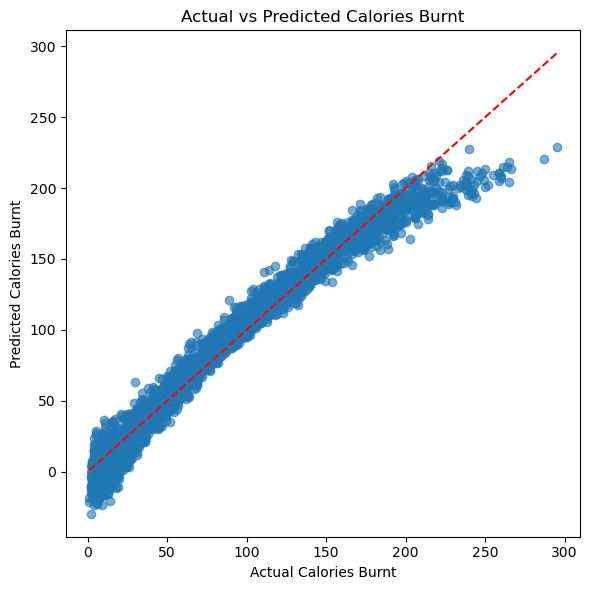

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# this finds the predict on test data
y_pred = model.predict(X_test_scaled)

# to calculate the evaluation metrics
# mean squared error and - a statistical metric that measures the average squared difference between the observed and predicted values of a model
# r squared - it measures how well the regression model fits the data, indicating the proportion of the variance in the dependent variable that is predictable from the independent variable(s))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# tabular comparison of actual vs predicted values (first 10)
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print("\nFirst Ten Actual vs. Predicted Calories Burnt:\n")
print(comparison)

# Visual comparison: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Calories Burnt')
plt.ylabel('Predicted Calories Burnt')
plt.title('Actual vs Predicted Calories Burnt')
plt.tight_layout()
plt.show()
